In [41]:
# Загрузка библиотек
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [2]:
# Загрузка данных
data =pd.read_csv('V8.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,cost_price,profit_markup,depth_of_tree,sales_commission,profit
0,0,1,3500.0,2,21,1000,-16500
1,1,2,3500.0,2,26,1000,-21500
2,2,3,NaN,2,23,1000,-18500
3,3,4,NaN,3,12,1000,-4000
4,4,5,3500.0,2,12,1000,-7500


In [3]:
# Определим размерность набора данных
data.shape

(500, 7)

In [4]:
# Определим тип атрибутов данных
data.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
cost_price          float64
profit_markup         int64
depth_of_tree         int64
sales_commission      int64
profit                int64
dtype: object

In [5]:
# Получение краткого описания даннфх
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      500 non-null    int64  
 1   Unnamed: 0        500 non-null    int64  
 2   cost_price        244 non-null    float64
 3   profit_markup     500 non-null    int64  
 4   depth_of_tree     500 non-null    int64  
 5   sales_commission  500 non-null    int64  
 6   profit            500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


In [6]:
# Сводка по числовым атрибутам
set_option('display.precision',3)
data.describe()

,Unnamed: 0.1,Unnamed: 0,cost_price,profit_markup,depth_of_tree,sales_commission,profit
count,500.000,500.000,244.0,500.000,500.000,500.0,500.000
mean,249.500,250.500,3500.0,3.498,15.896,1000.0,-6153.000
std,144.482,144.482,0.0,1.126,8.096,0.0,9080.529
min,0.000,1.000,3500.0,2.000,2.000,1000.0,-25500.000
25%,124.750,125.750,3500.0,3.000,9.000,1000.0,-12500.000
50%,249.500,250.500,3500.0,3.000,16.000,1000.0,-6500.000
75%,374.250,375.250,3500.0,5.000,23.000,1000.0,500.000
max,499.000,500.000,3500.0,5.000,30.000,1000.0,13000.000


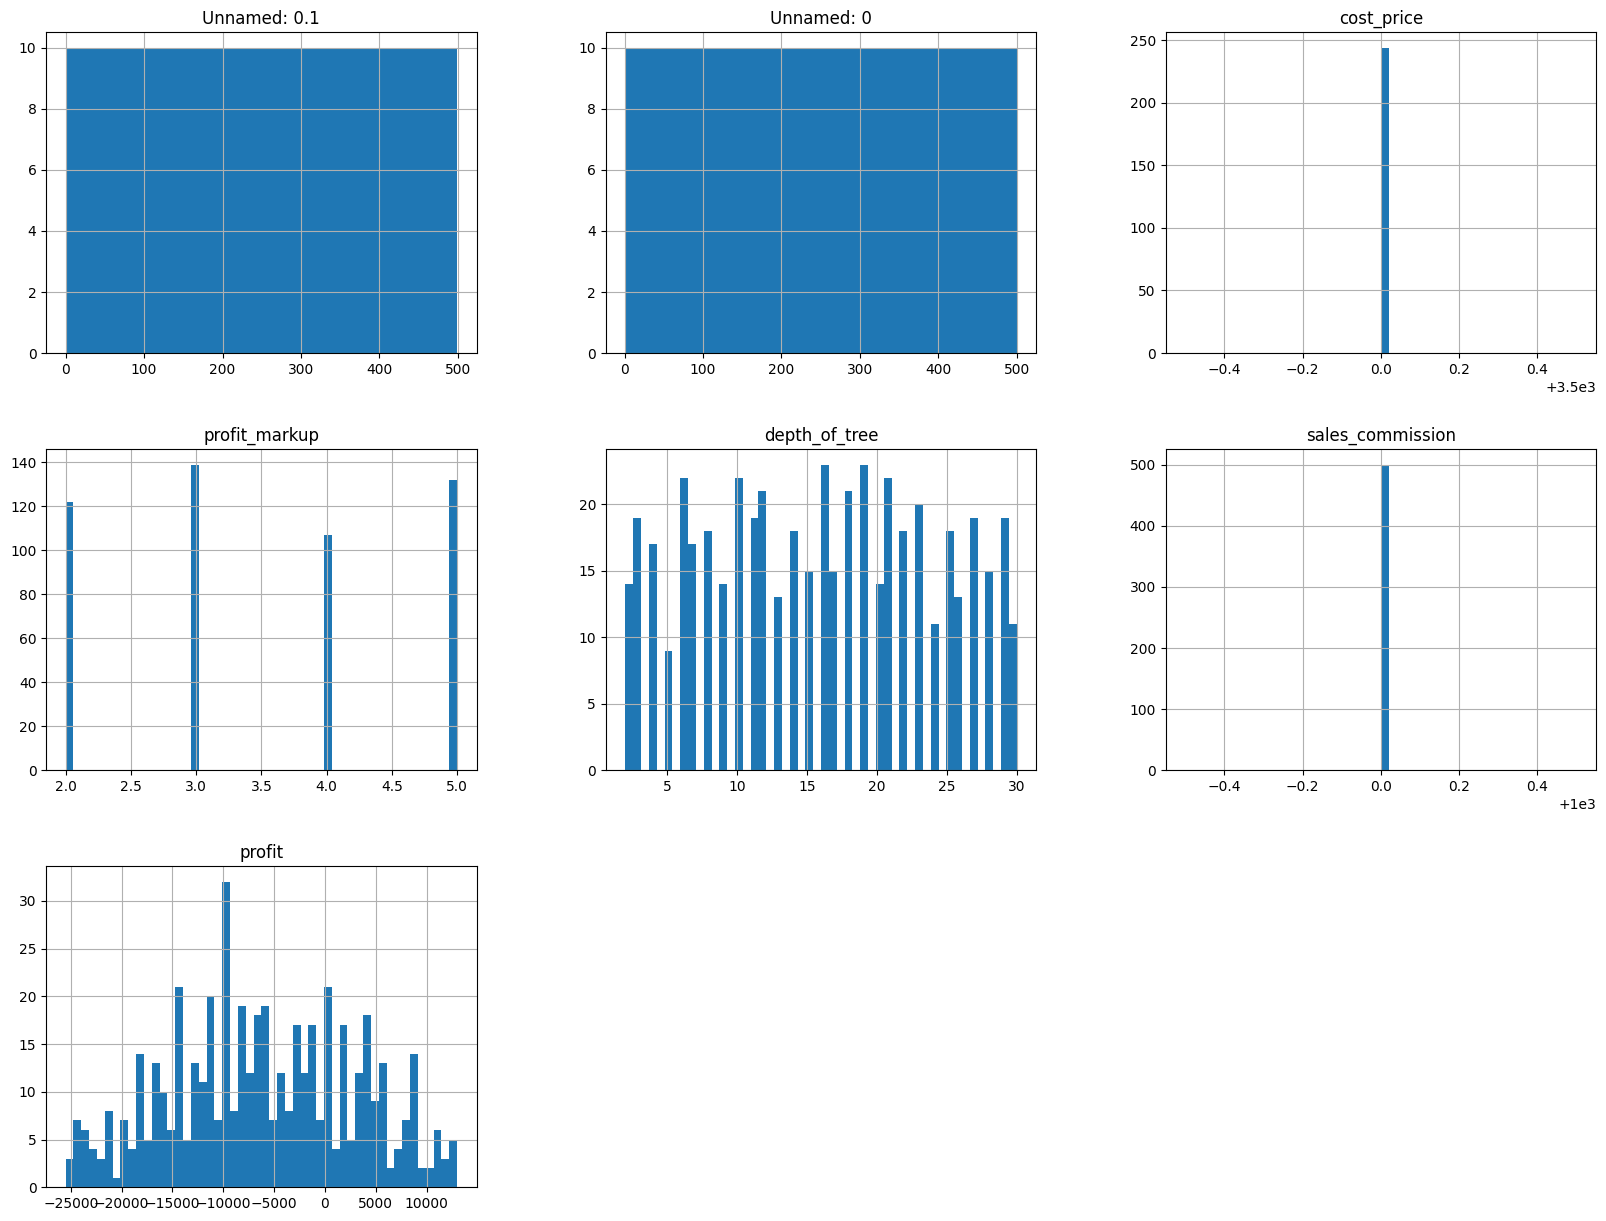

In [7]:
# Визуализация данных
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

# Замечаем, что из всех данных, значащими признаками можно выбрать profit_markup, depth_of_tree, profit

In [8]:
# Создание фрейма из 2-х
profit = data.profit
depth_of_tree = data.depth_of_tree
profit_markup = data.profit_markup
subdata = pd.DataFrame({'profit':profit,'depth_of_tree':depth_of_tree})
subdata2 = pd.DataFrame({'profit':profit,'profit_markup':profit_markup})
subdata

,profit,depth_of_tree
0,-16500,21
1,-21500,26
2,-18500,23
3,-4000,12
4,-7500,12
...,...,...
495,3000,12
496,0,8
497,-5500,10
498,-9500,21


In [9]:
subdata2

,profit,profit_markup
0,-16500,2
1,-21500,2
2,-18500,2
3,-4000,3
4,-7500,2
...,...,...
495,3000,5
496,0,3
497,-5500,2
498,-9500,4


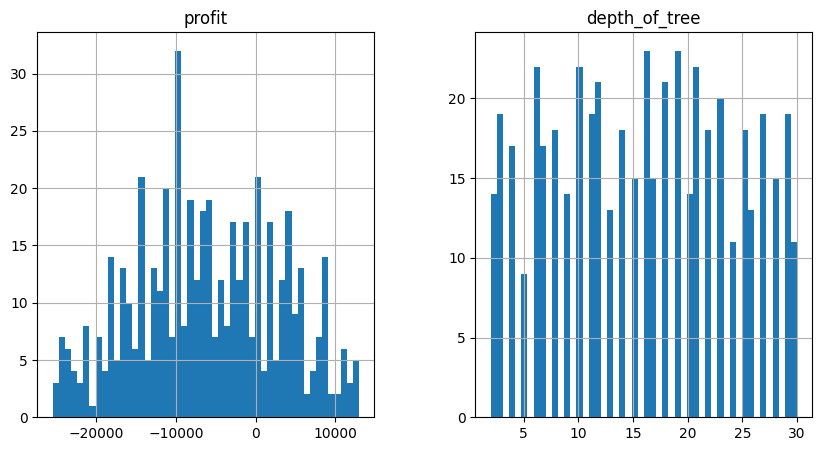

In [10]:
%matplotlib inline
subdata.hist(bins=50, figsize=(10,5))
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

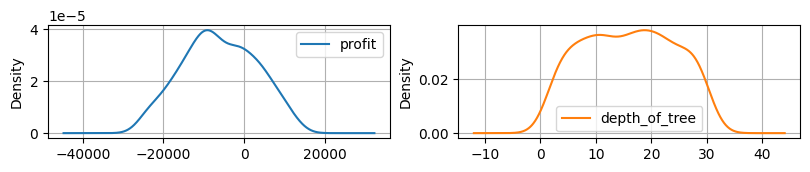

In [11]:
# Графики плотности
%matplotlib inline
subdata.plot(kind='density',subplots=True, layout=(3,3),sharex=False,legend=True, fontsize=10,figsize=(15,5),grid=True)

# Как видно из графиков плотности, для атрибута profit пик находится в области -10000, а для depth_of_tree в области 10, 17, 20

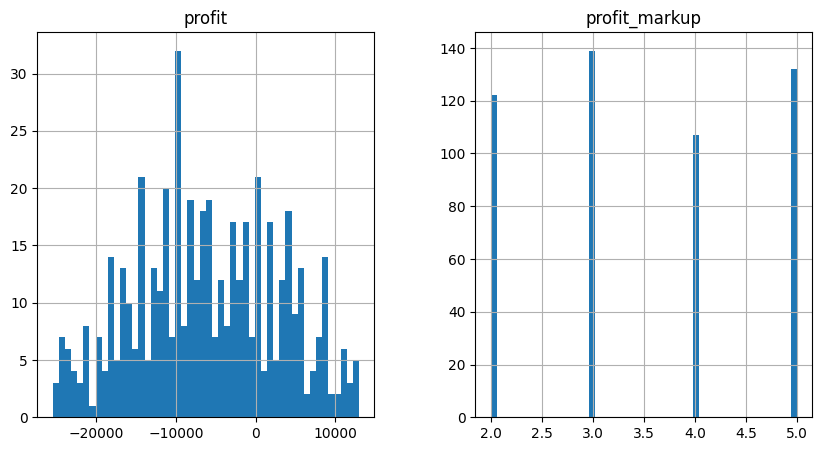

In [12]:
%matplotlib inline
subdata2.hist(bins=50, figsize=(10,5))
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

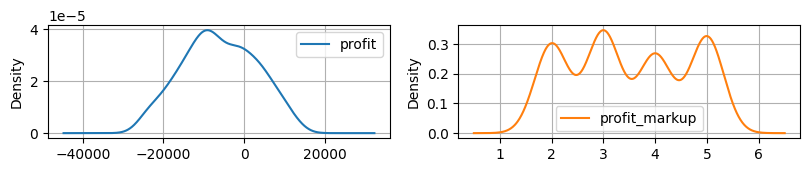

In [13]:
# Графики плотности
%matplotlib inline
subdata2.plot(kind='density',subplots=True, layout=(3,3),sharex=False,legend=True, fontsize=10,figsize=(15,5),grid=True)

<Axes: title={'center': 'Correlation Matrix'}>

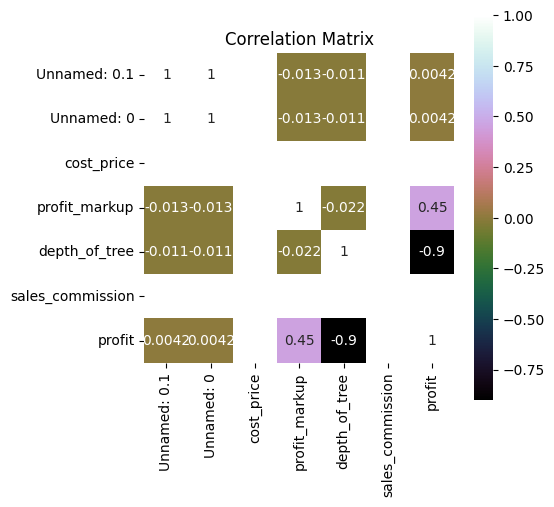

In [14]:
# Корреляционная матрица
%matplotlib inline
correlation = data.corr()
plt.figure(figsize=(5,5))
plt.title('Correlation Matrix')
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='cubehelix')

# Из корреляционной матрицы отчетливо видно, что атрибут unnamed: 0.1 и unnamed: 0 коррелируют друг, с другом, поэтому необходимо избавиться от одного атрибута

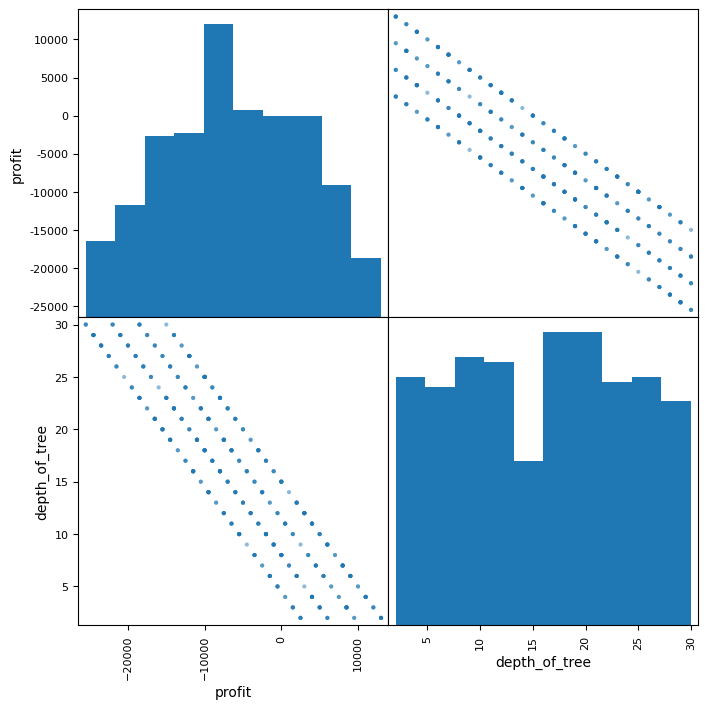

In [15]:
scatter_matrix(subdata,figsize=(8,8))
plt.show()

<Axes: xlabel='depth_of_tree', ylabel='profit'>

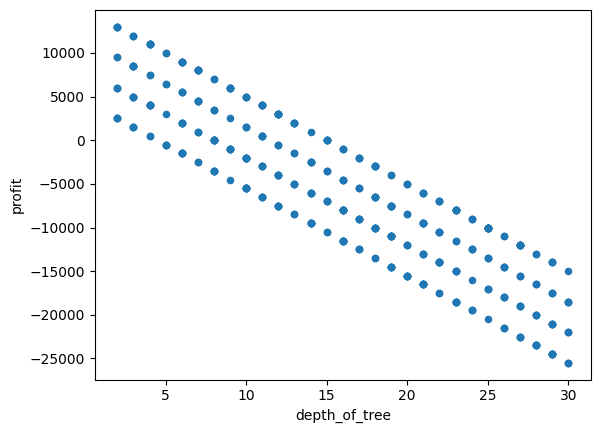

In [16]:
data.plot(kind='scatter',x='depth_of_tree',y='profit',alpha=1)

# Из матрицы диаграммы рассеяния можно сделать следующие выводы: с увеличением глубины отрицательно растет значение прибыли. Если глубина меньше или равна 5, то человек, как минимум выйдет в 0 прибыли, а может даже и что-то получить. Если же глубина превысит значение 17, то человек точно окажется в минусе.

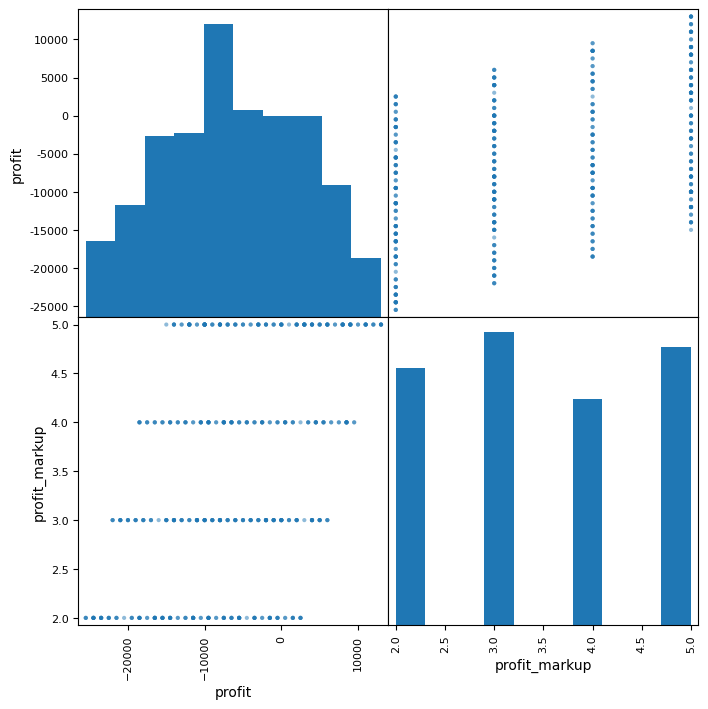

In [17]:
scatter_matrix(subdata2,figsize=(8,8))
plt.show()

# Можно отметить, что чем больше значение profit_markup тем меньше максимальная отрицательная прибыль, но также больше максимальная прибыль

C:\Users\User\PycharmProjects\Int_Analysis\venv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\User\PycharmProjects\Int_Analysis\venv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\User\PycharmProjects\Int_Analysis\venv\lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


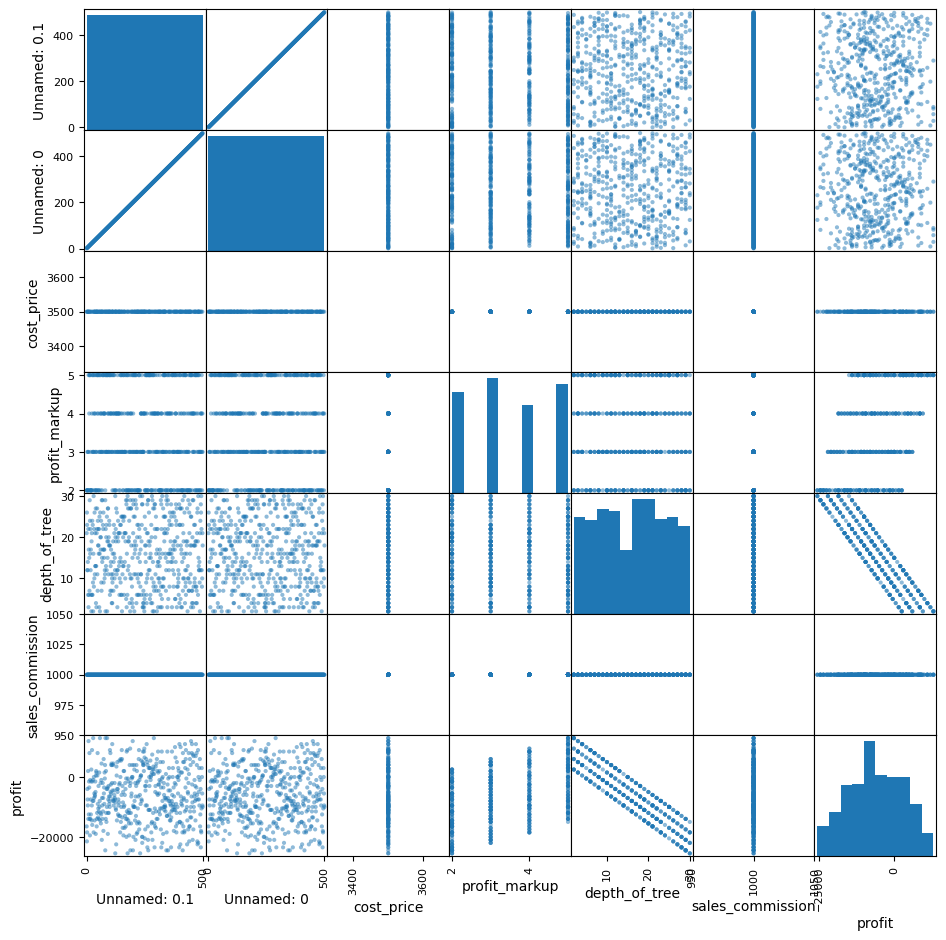

In [18]:
scatter_matrix(data, figsize=(11,11))
plt.show()

In [19]:
corr_matrix = data.corr()
corr_matrix

,Unnamed: 0.1,Unnamed: 0,cost_price,profit_markup,depth_of_tree,sales_commission,profit
Unnamed: 0.1,1.000,1.000,NaN,-0.013,-0.011,NaN,0.004
Unnamed: 0,1.000,1.000,NaN,-0.013,-0.011,NaN,0.004
cost_price,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profit_markup,-0.013,-0.013,NaN,1.000,-0.022,NaN,0.453
depth_of_tree,-0.011,-0.011,NaN,-0.022,1.000,NaN,-0.901
sales_commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profit,0.004,0.004,NaN,0.453,-0.901,NaN,1.000


In [20]:
corr_matrix['depth_of_tree'].sort_values(ascending=False)
# Сильная отрицательная корреляция с profit, если растет глубина, то уменьшается профит
# Близко к 0 означает отсутствие линейной корреляции

depth_of_tree       1.000
Unnamed: 0.1       -0.011
Unnamed: 0         -0.011
profit_markup      -0.022
profit             -0.901
cost_price            NaN
sales_commission      NaN
Name: depth_of_tree, dtype: float64

In [21]:
# Заполнить пустые ячейки
data1 = pd.DataFrame(data)
median = data1['cost_price'].median()
data1['cost_price'].fillna(median,inplace=True)
data1

,Unnamed: 0.1,Unnamed: 0,cost_price,profit_markup,depth_of_tree,sales_commission,profit
0,0,1,3500.0,2,21,1000,-16500
1,1,2,3500.0,2,26,1000,-21500
2,2,3,3500.0,2,23,1000,-18500
3,3,4,3500.0,3,12,1000,-4000
4,4,5,3500.0,2,12,1000,-7500
...,...,...,...,...,...,...,...
495,495,496,3500.0,5,12,1000,3000
496,496,497,3500.0,3,8,1000,0
497,497,498,3500.0,2,10,1000,-5500
498,498,499,3500.0,4,21,1000,-9500


In [22]:
# Отбор существенных признаков
data_x = data.iloc[:,:6]
data_y=data['profit']
bestfeatures =SelectKBest(k=5)
fit = bestfeatures.fit(data_x,data_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data_x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores

C:\Users\User\PycharmProjects\Int_Analysis\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [2 5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\User\PycharmProjects\Int_Analysis\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,0,0
0,Unnamed: 0.1,1.216
1,Unnamed: 0,1.216
2,cost_price,NaN
3,profit_markup,4.930
4,depth_of_tree,40.190
5,sales_commission,NaN


In [23]:
data1.drop(['Unnamed: 0.1','Unnamed: 0','cost_price','sales_commission',],axis=1,inplace=True)
data1

,profit_markup,depth_of_tree,profit
0,2,21,-16500
1,2,26,-21500
2,2,23,-18500
3,3,12,-4000
4,2,12,-7500
...,...,...,...
495,5,12,3000
496,3,8,0
497,2,10,-5500
498,4,21,-9500


In [24]:
# Сформирован новый набор данных
data1.insert(0,'Cost_prise',np.random.randint(1500,5000,data.shape[0]))
data1

,Cost_prise,profit_markup,depth_of_tree,profit
0,2636,2,21,-16500
1,4411,2,26,-21500
2,3093,2,23,-18500
3,4648,3,12,-4000
4,1757,2,12,-7500
...,...,...,...,...
495,2723,5,12,3000
496,3150,3,8,0
497,4206,2,10,-5500
498,1701,4,21,-9500


In [25]:
# Нормализация
scaler = Normalizer().fit(data)
norm_data = pd.DataFrame(scaler.fit_transform(data))
norm_data

,0,1,2,3,4,5,6
0,0.000e+00,5.918e-05,0.207,1.184e-04,0.001,0.059,-0.977
1,4.586e-05,9.172e-05,0.161,9.172e-05,0.001,0.046,-0.986
2,1.061e-04,1.591e-04,0.186,1.061e-04,0.001,0.053,-0.981
3,5.547e-04,7.396e-04,0.647,5.547e-04,0.002,0.185,-0.740
4,4.798e-04,5.998e-04,0.420,2.399e-04,0.001,0.120,-0.900
...,...,...,...,...,...,...,...
495,1.038e-01,1.040e-01,0.734,1.048e-03,0.003,0.210,0.629
496,1.338e-01,1.341e-01,0.944,8.092e-04,0.002,0.270,0.000
497,7.493e-02,7.508e-02,0.528,3.015e-04,0.002,0.151,-0.829
498,4.883e-02,4.893e-02,0.343,3.922e-04,0.002,0.098,-0.932


In [26]:
scaler1 = Normalizer().fit(data1)
norm_data1 = pd.DataFrame(scaler1.fit_transform(data1))
norm_data1

,0,1,2,3
0,0.158,1.197e-04,0.001,-0.987
1,0.201,9.113e-05,0.001,-0.980
2,0.165,1.066e-04,0.001,-0.986
3,0.758,4.892e-04,0.002,-0.652
4,0.228,2.596e-04,0.002,-0.974
...,...,...,...,...
495,0.672,1.234e-03,0.003,0.740
496,1.000,9.524e-04,0.003,0.000
497,0.607,2.889e-04,0.001,-0.794
498,0.176,4.145e-04,0.002,-0.984


In [52]:
# Выделение обучающей и тестовой выборок
data_x = data.iloc[:,:8]
data_y = data['profit']

test_size = 0.2

seed = 5
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=test_size, random_state=seed)


,Unnamed: 0.1,Unnamed: 0,cost_price,profit_markup,depth_of_tree,sales_commission,profit
247,247,248,3500.0,4,3,1000,8500
390,390,391,3500.0,2,20,1000,-15500
186,186,187,3500.0,3,11,1000,-3000
484,484,485,3500.0,5,12,1000,3000
139,139,140,3500.0,2,13,1000,-8500
...,...,...,...,...,...,...,...
486,486,487,3500.0,3,9,1000,-1000
189,189,190,3500.0,3,10,1000,-2000
495,495,496,3500.0,5,12,1000,3000
206,206,207,3500.0,3,16,1000,-8000


In [28]:
# data_train
model = ElasticNet(l1_ratio = 0.5).fit(data_x_train,data_y_train)
data_y_pred=model.predict(data_x_train)
rmse_lin = np.sqrt(mean_squared_error(data_y_train,data_y_pred))
r2_lin = r2_score(data_y_train,data_y_pred)
print("RMSE for Linear Regression:", rmse_lin)
print("R2_score for Linear Regression", r2_lin)

RMSE for Linear Regression: 0.0001109332161351193
R2_score for Linear Regression 0.9999999999999999


In [29]:
polynomial_features = PolynomialFeatures(degree=2)
data_x_poly=polynomial_features.fit_transform(data_x_train)
model = ElasticNet(l1_ratio = 0.5).fit(data_x_poly,data_y_train)
data_y_poly_pred=model.predict(data_x_poly)
rmse_poly =np.sqrt(mean_squared_error(data_y_train,data_y_poly_pred))
r2_poly = r2_score(data_y_train,data_y_poly_pred)
print("RMSE for Polynomial Regression:", rmse_poly)
print("R2_score for Polynomial Regression", r2_poly)

RMSE for Polynomial Regression: 0.053714717919823074
R2_score for Polynomial Regression 0.9999999999644933


In [30]:
# Выделение обучающей и тестовой выборок
data_x = norm_data.iloc[:,:8]
data_y = norm_data[6]

test_size = 0.2

seed = 5
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=test_size, random_state=seed)

In [31]:
# norm_data_train
model = ElasticNet(l1_ratio = 0.5).fit(data_x_train,data_y_train)
data_y_pred=model.predict(data_x_train)
rmse_lin = np.sqrt(mean_squared_error(data_y_train,data_y_pred))
r2_lin = r2_score(data_y_train,data_y_pred)
print("RMSE for Linear Regression:", rmse_lin)
print("R2_score for Linear Regression", r2_lin)

RMSE for Linear Regression: 0.7069271440860296
R2_score for Linear Regression 0.044570834269383464


In [32]:
polynomial_features = PolynomialFeatures(degree=2)
data_x_poly=polynomial_features.fit_transform(data_x_train)
model = ElasticNet(l1_ratio = 0.5).fit(data_x_poly,data_y_train)
data_y_poly_pred=model.predict(data_x_poly)
rmse_poly =np.sqrt(mean_squared_error(data_y_train,data_y_poly_pred))
r2_poly = r2_score(data_y_train,data_y_poly_pred)
print("RMSE for Polynomial Regression:", rmse_poly)
print("R2_score for Polynomial Regression", r2_poly)

RMSE for Polynomial Regression: 0.7069271440860296
R2_score for Polynomial Regression 0.044570834269383464


In [33]:
# Выделение обучающей и тестовой выборок
data_x = data1.iloc[:,:5]
data_y = data1['profit']

test_size = 0.2

seed = 5
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=test_size, random_state=seed)

In [34]:
# data1_train
model = ElasticNet(l1_ratio = 0.5).fit(data_x_train,data_y_train)
data_y_pred=model.predict(data_x_train)
rmse_lin = np.sqrt(mean_squared_error(data_y_train,data_y_pred))
r2_lin = r2_score(data_y_train,data_y_pred)
print("RMSE for Linear Regression:", rmse_lin)
print("R2_score for Linear Regression", r2_lin)

RMSE for Linear Regression: 0.0001109332161351193
R2_score for Linear Regression 0.9999999999999999


In [35]:
polynomial_features = PolynomialFeatures(degree=2)
data_x_poly=polynomial_features.fit_transform(data_x_train)
model = ElasticNet(l1_ratio = 0.5).fit(data_x_poly,data_y_train)
data_y_poly_pred=model.predict(data_x_poly)
rmse_poly =np.sqrt(mean_squared_error(data_y_train,data_y_poly_pred))
r2_poly = r2_score(data_y_train,data_y_poly_pred)
print("RMSE for Polynomial Regression:", rmse_poly)
print("R2_score for Polynomial Regression", r2_poly)

RMSE for Polynomial Regression: 0.35363832553799845
R2_score for Polynomial Regression 0.9999999984609885


In [36]:
# Выделение обучающей и тестовой выборок
data_x = norm_data1.iloc[:,:5]
data_y = norm_data1[3]

test_size = 0.2

seed = 5
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=test_size, random_state=seed)

In [37]:
# norm_data1_train
model = ElasticNet(l1_ratio = 0.5).fit(data_x_train,data_y_train)
data_y_pred=model.predict(data_x_train)
rmse_lin = np.sqrt(mean_squared_error(data_y_train,data_y_pred))
r2_lin = r2_score(data_y_train,data_y_pred)
print("RMSE for Linear Regression:", rmse_lin)
print("R2_score for Linear Regression", r2_lin)

RMSE for Linear Regression: 0.7064577067726447
R2_score for Linear Regression 0.08383918167178728


In [38]:
polynomial_features = PolynomialFeatures(degree=2)
data_x_poly=polynomial_features.fit_transform(data_x_train)
model = ElasticNet(l1_ratio = 0.5).fit(data_x_poly,data_y_train)
data_y_poly_pred=model.predict(data_x_poly)
rmse_poly =np.sqrt(mean_squared_error(data_y_train,data_y_poly_pred))
r2_poly = r2_score(data_y_train,data_y_poly_pred)
print("RMSE for Polynomial Regression:", rmse_poly)
print("R2_score for Polynomial Regression", r2_poly)

RMSE for Polynomial Regression: 0.7064577067726447
R2_score for Polynomial Regression 0.08383918167178728


# Среди метрик RMSE и R2, лучший результат показывает RMSE для линейной регресси, поэтому будем выполнять Grid search для RMSE на новых сформированных данных

Linear ratio =  0.0
RMSE for Linear Regression: 0.7064577067726447
R2_score for Linear Regression 0.08383918167178728
Linear ratio =  0.25
RMSE for Linear Regression: 0.7064577067726447
R2_score for Linear Regression 0.08383918167178728
Linear ratio =  0.5
RMSE for Linear Regression: 0.7064577067726447
R2_score for Linear Regression 0.08383918167178728
Linear ratio =  0.75
RMSE for Linear Regression: 0.7064577067726447
R2_score for Linear Regression 0.08383918167178728
Linear ratio =  1
RMSE for Linear Regression: 0.7064577067726447
R2_score for Linear Regression 0.08383918167178728
Names: [0.0, 0.25, 0.5, 0.75, 1]
Rmse: [0.0008615483643019708, 0.0001109332161351193, 0.0001109332161351193, 0.00011093321679012279, 0.752689132891182]
Names: [0.0, 0.25, 0.5, 0.75, 1]
R2: [0.9999999999999909, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999930280461]


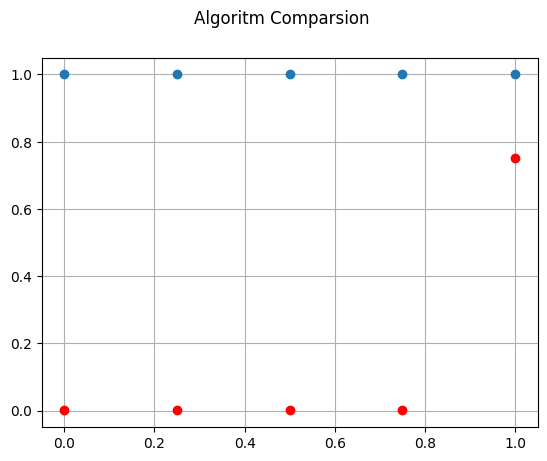

In [39]:
# Grid search trainFrame
data_x = data1.iloc[:,:5]
data_y = data1['profit']

test_size = 0.2

seed = 5
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=test_size, random_state=seed)

l1_ratio=[0.0,0.25,0.5,0.75,1]
results_rmse=[]
results_r2=[]
names=[]
for lr in l1_ratio:
    model = ElasticNet(l1_ratio = lr).fit(data_x_train,data_y_train)
    data_y_pred=model.predict(data_x_train)
    rmse = np.sqrt(mean_squared_error(data_y_train,data_y_pred))
    r2 = r2_score(data_y_train,data_y_pred)
    results_rmse.append(rmse)
    results_r2.append(r2)
    names.append(lr)
    print('Linear ratio = ', lr)
    print("RMSE for Linear Regression:", rmse_lin)
    print("R2_score for Linear Regression", r2_lin)
print("Names:", names)
print("Rmse:", results_rmse)
print("Names:",names)
print("R2:", results_r2)
plt.plot(names, results_rmse,'o',color='red')
plt.plot(names, results_r2,'o')
plt.grid()
plt.suptitle("Algoritm Comparsion")
plt.show()
#l1_ratio = 0.25, l1_ratio = 0.5

# Grid search выявил лучшие параметры коэффициента l1_ratio на тренировочной выборке. l1_ratio = 0.25, l1_ratio = 0.5, эти коэффициенты дают лучший результат.

Linear ratio =  0.0
RMSE for Linear Regression: 0.7064577067726447
R2_score for Linear Regression 0.08383918167178728
Linear ratio =  0.25
RMSE for Linear Regression: 0.7064577067726447
R2_score for Linear Regression 0.08383918167178728
Linear ratio =  0.5
RMSE for Linear Regression: 0.7064577067726447
R2_score for Linear Regression 0.08383918167178728
Linear ratio =  0.75
RMSE for Linear Regression: 0.7064577067726447
R2_score for Linear Regression 0.08383918167178728
Linear ratio =  1
RMSE for Linear Regression: 0.7064577067726447
R2_score for Linear Regression 0.08383918167178728
Names: [0.0, 0.25, 0.5, 0.75, 1]
Rmse: [0.00093697798116904, 0.00010785630541604185, 0.00010785630541604185, 0.00010785630793005613, 0.7543307117433732]
Names: [0.0, 0.25, 0.5, 0.75, 1]
R2: [0.9999999999999898, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999933806603]


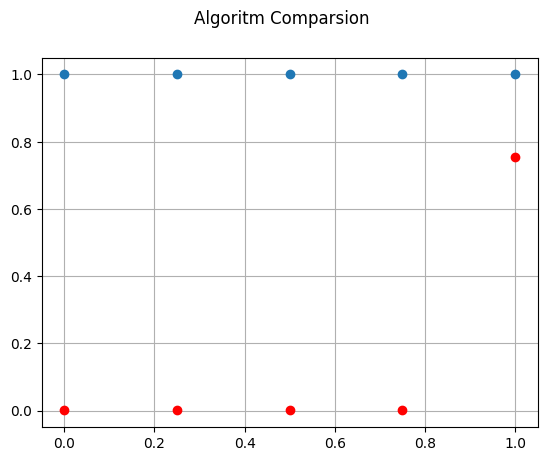

In [40]:
l1_ratio=[0.0,0.25,0.5,0.75,1]
results_rmse=[]
results_r2=[]
names=[]
for lr in l1_ratio:
    model = ElasticNet(l1_ratio = lr).fit(data_x_test,data_y_test)
    data_y_pred=model.predict(data_x_test)
    rmse = np.sqrt(mean_squared_error(data_y_test,data_y_pred))
    r2 = r2_score(data_y_test,data_y_pred)
    results_rmse.append(rmse)
    results_r2.append(r2)
    names.append(lr)
    print('Linear ratio = ', lr)
    print("RMSE for Linear Regression:", rmse_lin)
    print("R2_score for Linear Regression", r2_lin)
print("Names:", names)
print("Rmse:", results_rmse)
print("Names:",names)
print("R2:", results_r2)
plt.plot(names, results_rmse,'o',color='red')
plt.plot(names, results_r2,'o')
plt.grid()
plt.suptitle("Algoritm Comparsion")
plt.show()
#l1_ratio = 0.25, l1_ratio = 0.5, l1_ratio = 0.75

# Grid search выявил лучшие параметры коэффициента l1_ratio на тренировочной выборке. l1_ratio = 0.25, l1_ratio = 0.5, эти коэффициенты дают лучший результат.